In [23]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

from joblib import dump

# Tree Visualisation
from sklearn.tree import export_graphviz, plot_tree
import graphviz

In [24]:
df = pd.read_csv("reverse.csv")
df.head()

,Date,Show,Keyword1,Keyword2,Keyword3,Keyword4,Keyword5,Keyword6,Keyword7,Keyword8,...,Keyword18,Keyword19,Keyword20,Keyword21,Keyword22,Keyword23,Average,Mean,Median,Quantile
0,2004-11,4,61,52,56,59,55,95,53,68,...,43,24,20,32,50,30,47.826087,low,low,low
1,2004-12,6,55,50,46,45,49,82,47,60,...,41,27,20,26,45,26,43.086957,low,low,low
2,2005-01,6,58,55,55,50,55,86,50,70,...,43,32,24,29,43,28,45.739130,low,low,low
3,2005-02,7,67,60,50,59,53,90,62,72,...,47,30,25,33,51,31,49.652174,low,low,low
4,2005-03,11,63,53,52,49,54,82,60,73,...,45,30,23,31,44,31,47.826087,low,low,low


In [25]:
df['Median'].value_counts()

Median
low     326
high    325
Name: count, dtype: int64

In [26]:
MedianDF = df
MedianDF = MedianDF.drop(columns=['Date', 'Show', 'Average', 'Mean', 'Quantile'])

In [27]:
MedianDF['Median'] = MedianDF['Median'].map({'low':0,'high':1})

X = MedianDF.drop('Median', axis=1)
y = MedianDF['Median']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [28]:
estx = 100
esty = 500
depx = 2
depy = 6
niter = 10
folds = 5

In [29]:
param_dist = {'n_estimators': randint(estx,esty),
                'max_depth': randint(depx,depy)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                    param_distributions = param_dist, 
                                    n_iter=niter, 
                                    cv=folds)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000025E80571390>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000025E84336B10>})

In [30]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 5, 'n_estimators': 461}


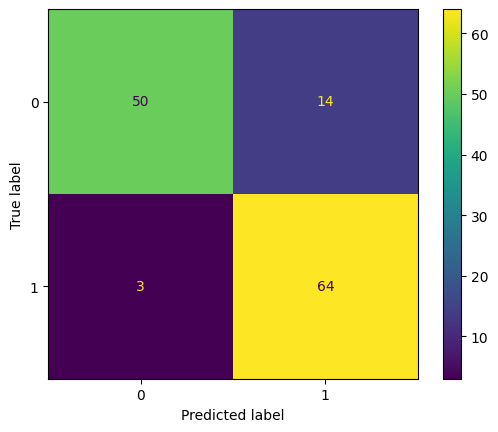

In [31]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [32]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8702290076335878
Precision: 0.8702290076335878
Recall: 0.8702290076335878



(process:10612): Pango-WARNING **: 21:52:17.178: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


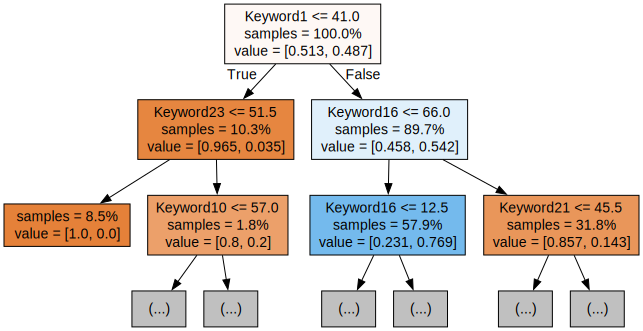


(process:16296): Pango-WARNING **: 21:52:17.724: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


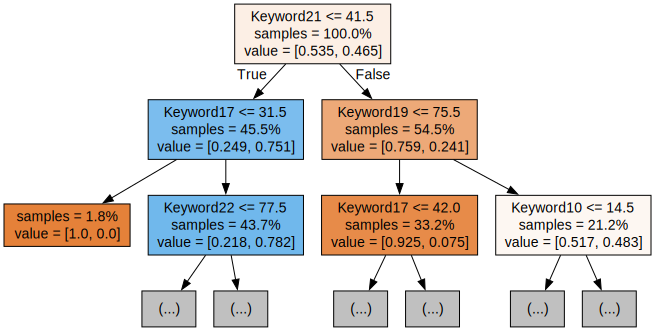


(process:22476): Pango-WARNING **: 21:52:18.285: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


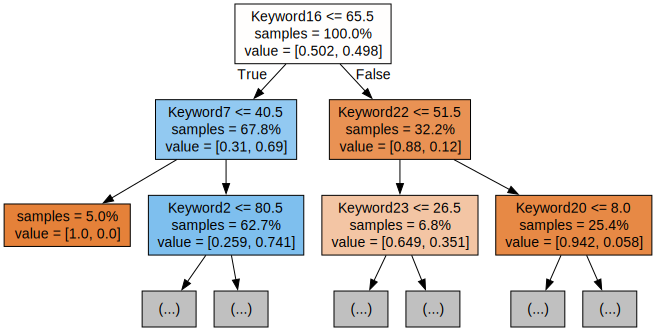

In [33]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = best_rf.estimators_[i]
    dot_data = export_graphviz(tree,
                                feature_names=X_train.columns,  
                                filled=True,  
                                max_depth=2, 
                                impurity=False, 
                                proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

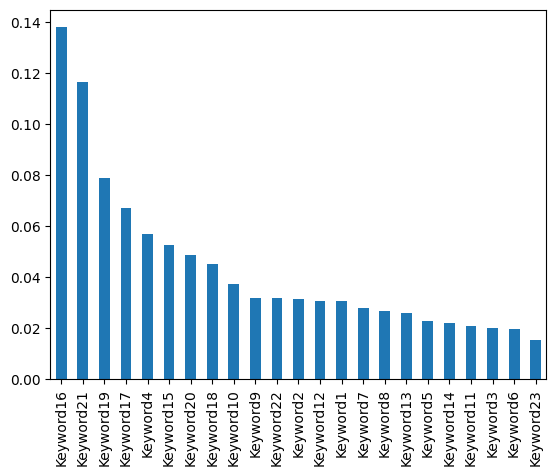

In [34]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

Best hyperparameters: {'max_depth': 5, 'n_estimators': 189}
Accuracy: 0.9242424242424242
Precision: 0.9242424242424242
Recall: 0.9242424242424242


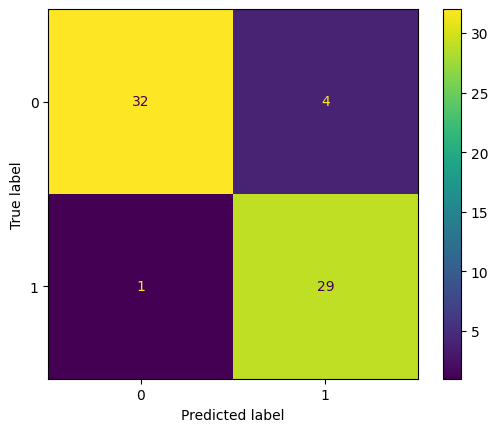

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)
param_dist = {'n_estimators': randint(estx,esty),
                'max_depth': randint(depx,depy)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                    param_distributions = param_dist, 
                                    n_iter=niter, 
                                    cv=folds)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)
# Create a variable for the best model
best_rf2 = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)
# Generate predictions with the best model
y_pred = best_rf2.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

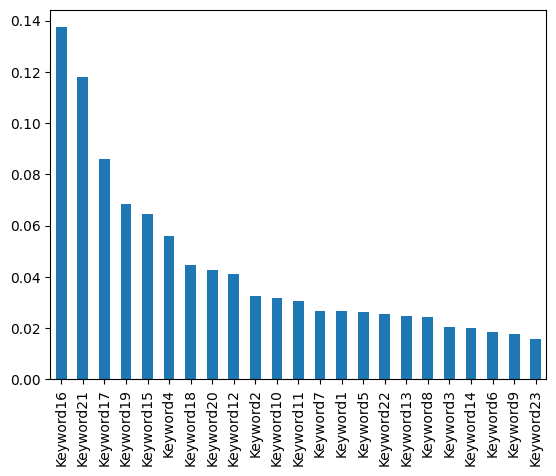

In [45]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf2.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

In [36]:
#dump(best_rf,"reverseMedian.joblib")


(process:24396): Pango-WARNING **: 21:52:28.592: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


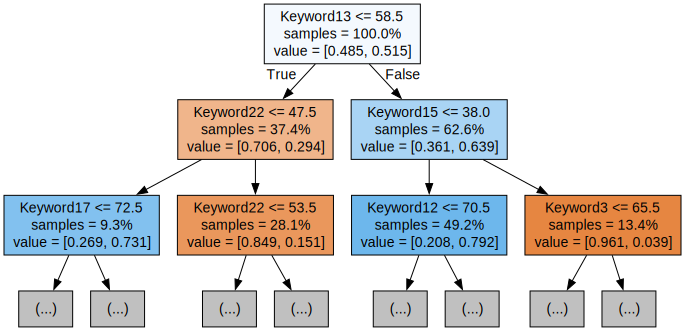


(process:7876): Pango-WARNING **: 21:52:29.191: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


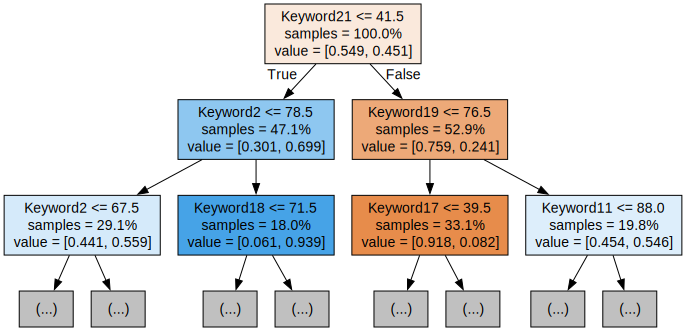


(process:19580): Pango-WARNING **: 21:52:29.856: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


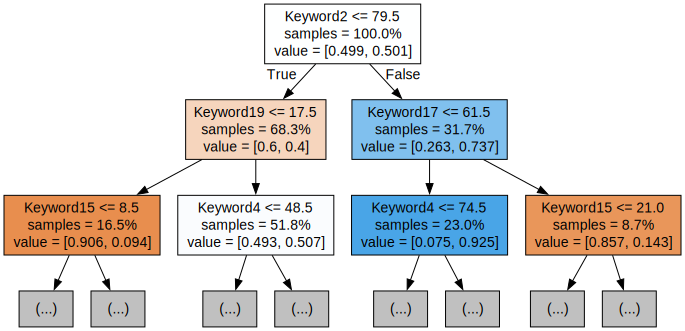

In [37]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = best_rf2.estimators_[i]
    dot_data = export_graphviz(tree,
                                feature_names=X_train.columns,  
                                filled=True,  
                                max_depth=2, 
                                impurity=False, 
                                proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

Best hyperparameters: {'max_depth': 5, 'n_estimators': 116}
Accuracy: 0.8367346938775511
Precision: 0.8367346938775511
Recall: 0.8367346938775511


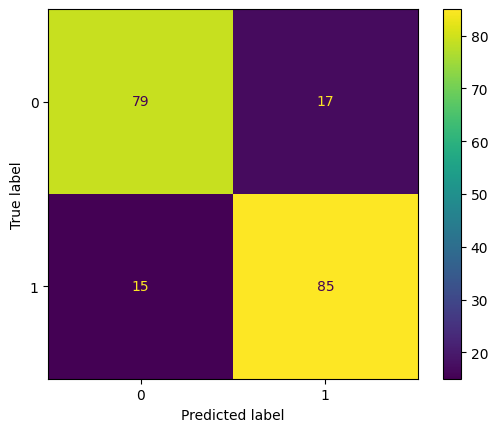

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
param_dist = {'n_estimators': randint(estx,esty),
                'max_depth': randint(depx,depy)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                    param_distributions = param_dist, 
                                    n_iter=niter, 
                                    cv=folds)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)
# Create a variable for the best model
best_rf3 = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)
# Generate predictions with the best model
y_pred = best_rf3.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

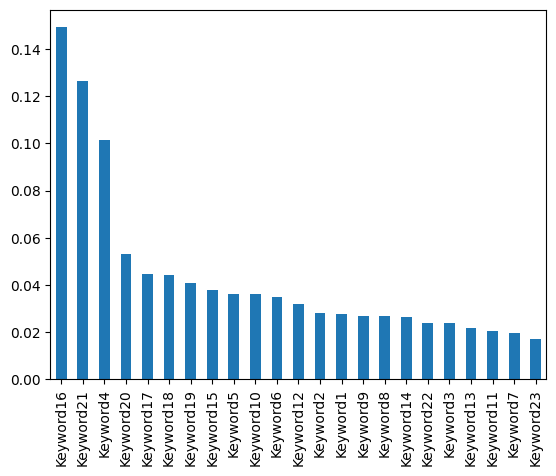

In [47]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf3.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();


(process:25092): Pango-WARNING **: 21:52:43.788: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


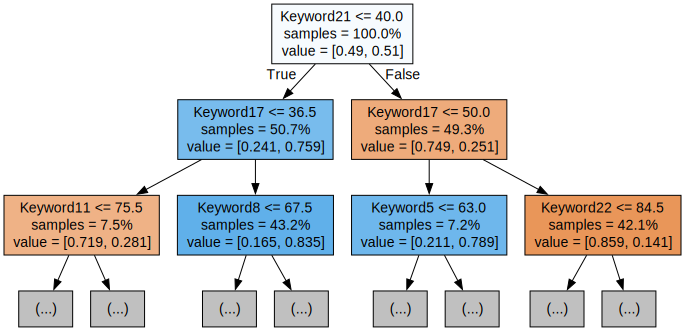


(process:23340): Pango-WARNING **: 21:52:44.319: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


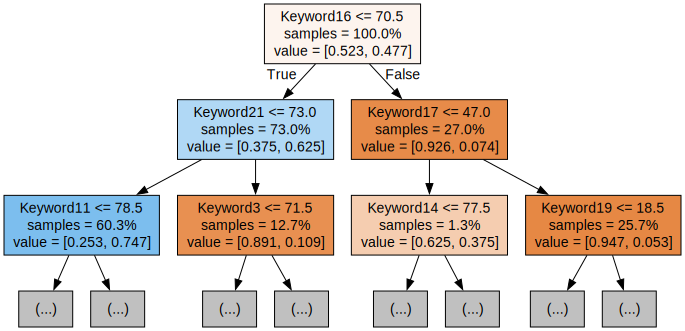


(process:14416): Pango-WARNING **: 21:52:44.845: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


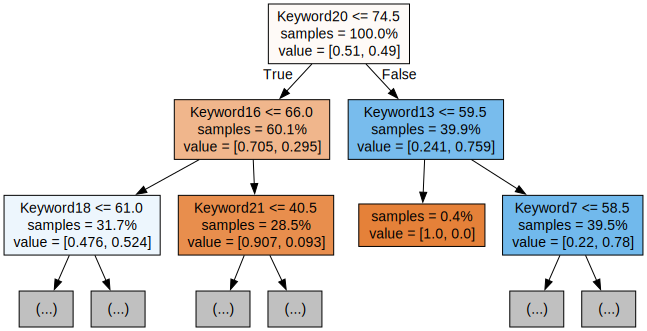

In [39]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = best_rf3.estimators_[i]
    dot_data = export_graphviz(tree,
                                feature_names=X_train.columns,  
                                filled=True,  
                                max_depth=2, 
                                impurity=False, 
                                proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

Best hyperparameters: {'max_depth': 5, 'n_estimators': 347}
Accuracy: 0.8467432950191571
Precision: 0.8467432950191571
Recall: 0.8467432950191571


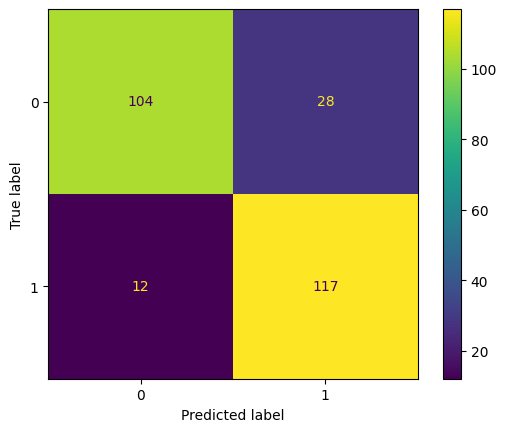

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)
param_dist = {'n_estimators': randint(estx,esty),
                'max_depth': randint(depx,depy)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                    param_distributions = param_dist, 
                                    n_iter=niter, 
                                    cv=folds)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)
# Create a variable for the best model
best_rf4 = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)
# Generate predictions with the best model
y_pred = best_rf4.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

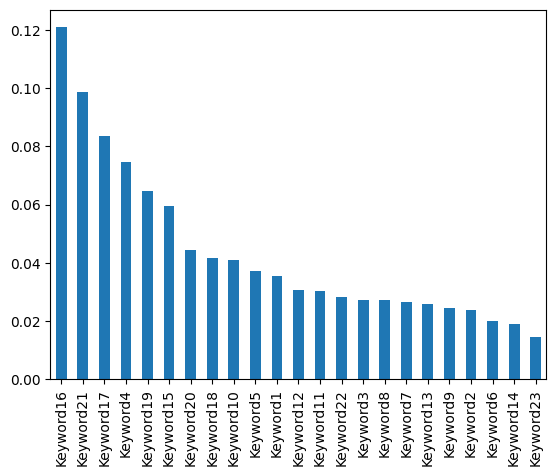

In [48]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf4.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

In [41]:
#dump(best_rf4, 'reverseMedian2.joblib')


(process:22120): Pango-WARNING **: 21:52:58.442: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


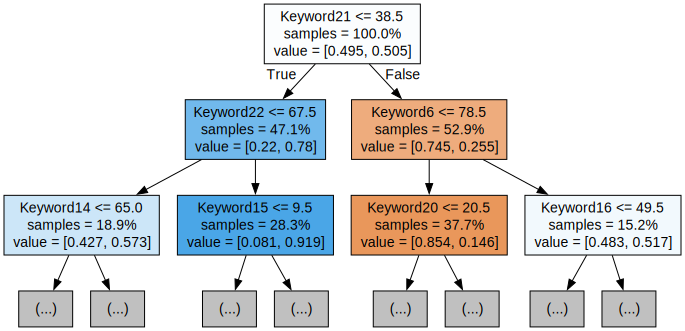


(process:7092): Pango-WARNING **: 21:52:59.036: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


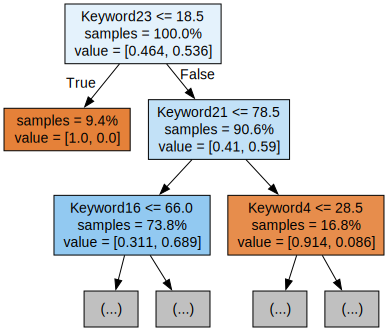


(process:17908): Pango-WARNING **: 21:52:59.633: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


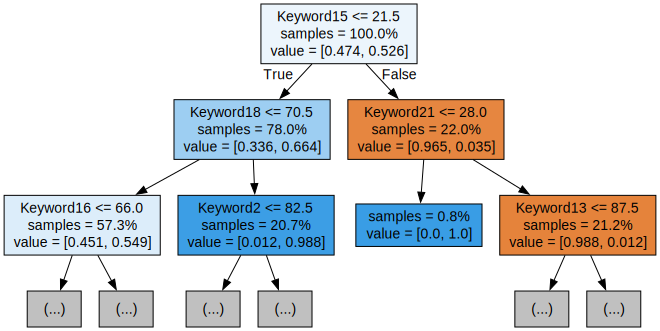

In [42]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = best_rf4.estimators_[i]
    dot_data = export_graphviz(tree,
                                feature_names=X_train.columns,  
                                filled=True,  
                                max_depth=2, 
                                impurity=False, 
                                proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

Best hyperparameters: {'max_depth': 5, 'n_estimators': 341}
Accuracy: 0.8834355828220859
Precision: 0.8834355828220859
Recall: 0.8834355828220859


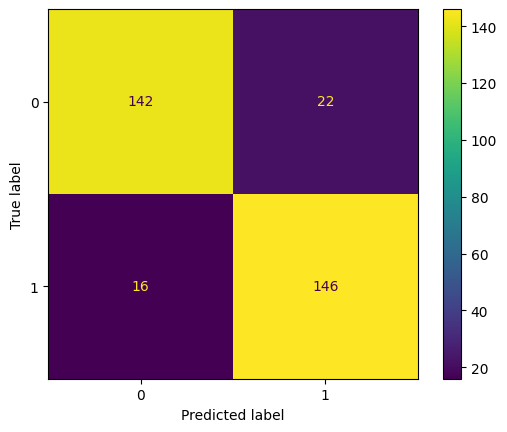

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)
param_dist = {'n_estimators': randint(estx,esty),
                'max_depth': randint(depx,depy)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                    param_distributions = param_dist, 
                                    n_iter=niter, 
                                    cv=folds)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)
# Create a variable for the best model
best_rf5 = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)
# Generate predictions with the best model
y_pred = best_rf5.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

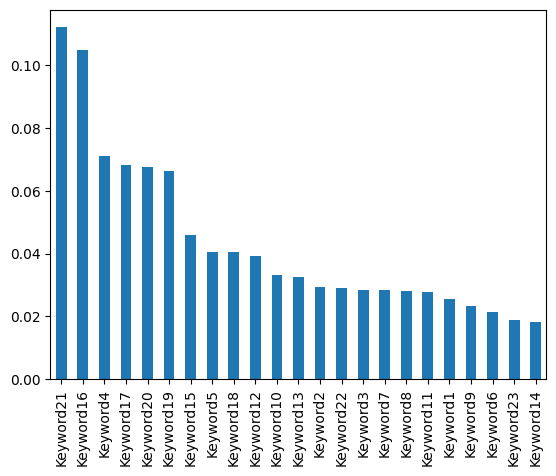

In [49]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf5.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();


(process:13740): Pango-WARNING **: 21:53:14.169: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


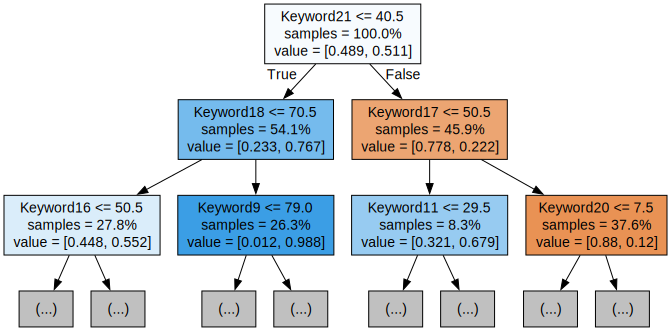


(process:8624): Pango-WARNING **: 21:53:14.725: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


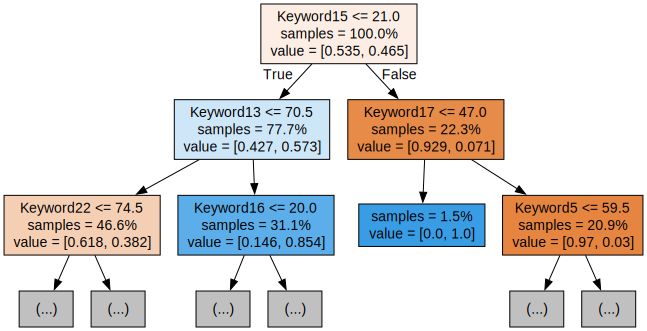


(process:3896): Pango-WARNING **: 21:53:15.319: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


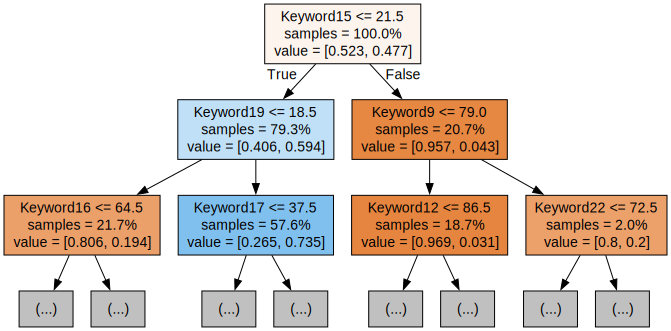

In [44]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = best_rf5.estimators_[i]
    dot_data = export_graphviz(tree,
                                feature_names=X_train.columns,  
                                filled=True,  
                                max_depth=2, 
                                impurity=False, 
                                proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)